In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('Preprocessed.csv')
data.head(10)

,Unnamed: 0,C3 Feed Rate,H2C3 Ratio,Reactor Pressure,Reactor Bed Level,C2 Flow Rate,Catalyst Feed Rate,Temperature,Melt Flow Rate (gm/10min)
0,0,0.626039,0.156122,0.605534,0.548468,0.427522,0.216268,0.191178,1.223775
1,1,0.674735,0.156122,0.625137,0.427020,0.338153,0.164036,0.079761,1.163151
2,2,0.685611,0.156122,0.595294,0.460480,0.370353,0.194934,0.076631,1.163151
3,3,0.643364,0.156122,0.689241,0.496188,0.346936,0.197283,0.091450,1.131402
4,4,0.625850,0.153061,0.651940,0.442636,0.319230,0.153123,0.092592,1.193922
5,5,0.662255,0.153061,0.609742,0.401205,0.237791,0.180520,0.094256,1.163151
6,6,0.682297,0.153061,0.606323,0.430902,0.341555,0.220660,0.130759,1.223775
7,7,0.780051,0.153061,0.621185,0.461491,0.375978,0.210956,0.118081,1.280934
8,8,0.801381,0.153061,0.568805,0.470063,0.413820,0.208673,0.054441,1.335001
9,9,0.752457,0.153061,0.568290,0.431514,0.348281,0.182163,0.050776,1.335001


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
X = data.drop(['Melt Flow Rate (gm/10min)'],axis=1)
y = data['Melt Flow Rate (gm/10min)']
X.shape,y.shape

((2484, 7), (2484,))

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1987, 7), (497, 7), (1987,), (497,))

In [6]:
modelrf =  RandomForestRegressor(n_estimators=100, random_state=42)
modelrf.fit(X_train, y_train)

y_pred_rf = modelrf.predict(X_test)

In [7]:
r2 = r2_score(y_test, y_pred_rf)
print('R2 Score',r2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:',rmse)

R2 Score 0.7920525798961345
Root Mean Squared Error: 0.28797917544641505


### Visualizations

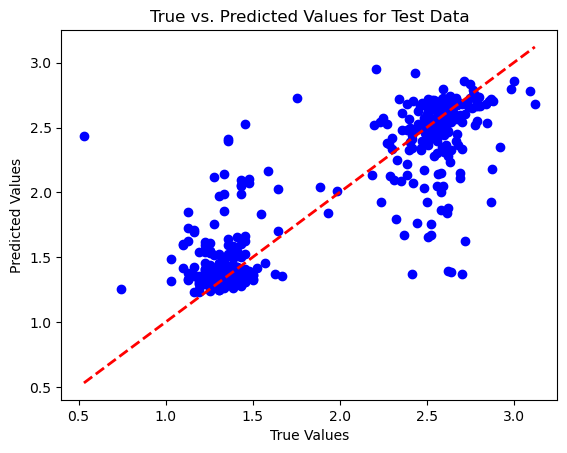

In [8]:
# plt.scatter(y_train, y_pred_train_lr, label='Train', color='green', marker='^')
plt.scatter(y_test, y_pred_rf, color='blue', marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for Test Data')
plt.show()

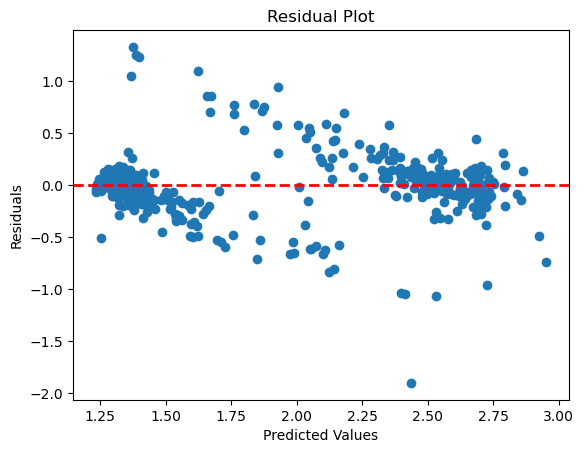

In [9]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### With Hyperparameter Tuning

In [10]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfhyp = RandomForestRegressor(random_state=42)

In [11]:
grid_search = GridSearchCV(rfhyp, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [12]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [13]:
best_regressor = RandomForestRegressor(**best_params, random_state=42)
best_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=150,
                      random_state=42)

In [14]:
y_pred_hpt = best_regressor.predict(X_test)

In [15]:
r2_hpt = r2_score(y_test, y_pred_hpt)
print('R2 Score after Hyperparameter Tuning:',r2_hpt)
rmse_hpt = np.sqrt(mean_squared_error(y_test, y_pred_hpt))
print('Root Mean Squared Error afetr Hyperparameter Tuning',rmse_hpt)

R2 Score after Hyperparameter Tuning: 0.790989939007787
Root Mean Squared Error afetr Hyperparameter Tuning 0.2887140450902622


### Visualizations

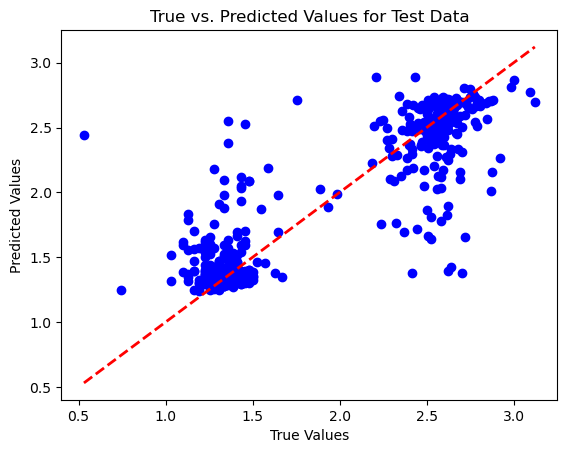

In [16]:
plt.scatter(y_test, y_pred_hpt, color='blue', marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for Test Data')
plt.show()

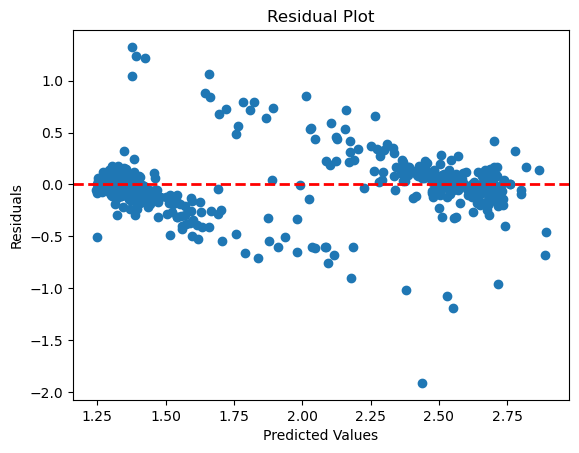

In [17]:
residuals = y_test - y_pred_hpt
plt.scatter(y_pred_hpt, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Model deployment

In [18]:
## The model for RF is giving the best accuracy without even hyperparameter tuning. Thus pickling it.

In [19]:
import pickle

In [20]:
## Pickling the model modelrf
with open('model.pkl', 'wb') as f:
    pickle.dump(modelrf, f)